# Lista 03PT2 - Tópicos III

In [1]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# new_train folder just contains three class: c0 = normal driving, c5 = operating the radio and c6 = driking

RESOLUTION = 150
BATCH_SIZE = 20

#if you need data augmentation processing
#train_datagen = ImageDataGenerator(
        #rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        #horizontal_flip=True,
        #validation_split=0.3)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        'all/imgs/new_train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        'all/imgs/new_train/',
        target_size=(RESOLUTION, RESOLUTION),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 4990 images belonging to 3 classes.
Found 2136 images belonging to 3 classes.


In [3]:
conv_base = InceptionV3(include_top=False, input_shape=(150, 150, 3), weights='imagenet')

87916544/87910968 [==============================] - 77s 1us/step


In [4]:
def inception_v3_pretrained_model(model_inception_v3, dropout_=False, regularizer_=False, regularizer_weight=0.001):
    model = Sequential()
    model.add(model_inception_v3)
    model.add(Flatten())
    
    if dropout_:
        model.add(Dropout(0.5))
    
    if regularizer_:
        model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=regularizer_weight, l2=regularizer_weight)))
    
    else:
        model.add(Dense(256, activation='relu'))
        # adjust here to 3 class
        model.add(Dense(3, activation='softmax'))
        model.summary()
        model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

    return model

In [5]:
model = inception_v3_pretrained_model(conv_base)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 26,522,403
Trainable params: 26,487,971
Non-trainable params: 34,432
_________________________________________________________________


In [6]:
N_TRAIN = 4990
N_VAL = 2136
history = model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // BATCH_SIZE),
        epochs=20,
        validation_data=val_generator,
        validation_steps=(N_VAL // BATCH_SIZE) 
        )

Epoch 1/20
249/249 [==============================] - 394s 2s/step - loss: 0.4545 - acc: 0.8355 - val_loss: 0.1222 - val_acc: 0.9649
Epoch 2/20
249/249 [==============================] - 347s 1s/step - loss: 0.0548 - acc: 0.9861 - val_loss: 0.1130 - val_acc: 0.9752
Epoch 3/20
249/249 [==============================] - 340s 1s/step - loss: 0.0171 - acc: 0.9956 - val_loss: 0.0455 - val_acc: 0.9841
Epoch 4/20
249/249 [==============================] - 342s 1s/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.0673 - val_acc: 0.9817
Epoch 5/20
249/249 [==============================] - 344s 1s/step - loss: 0.0051 - acc: 0.9994 - val_loss: 0.0308 - val_acc: 0.9911
Epoch 6/20
249/249 [==============================] - 335s 1s/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.0268 - val_acc: 0.9944
Epoch 7/20
249/249 [==============================] - 335s 1s/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.1085 - val_acc: 0.9831
Epoch 8/20
249/249 [==============================] - 335s 1s/step - 

## Report (item 3)

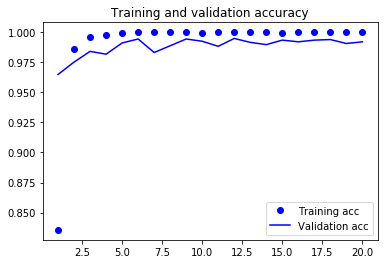

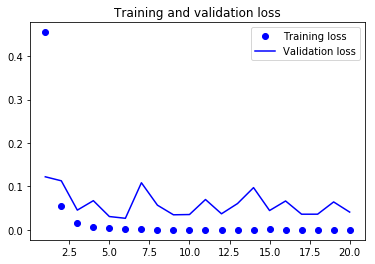

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')